# Estruturas para implementação de Filtros IIR

**Disciplina:** ENGG54 - Laboratório Integrado III-A - 2021.2

**Docente:** Paulo Farias

**Discentes:** Ana Clara Batista, André Paiva, Andrey Fontoura, Ariel Lima, Douglas Leite, Guilherme Costa, Jeferson Novaes, João Victor Carneiro, Pedro Augusto Correia, Pedro Freitas

## 1 - Inicialização

### 1.1 - Importação de bibliotecas

In [1]:
import numpy as np
from scipy import signal, misc, fftpack
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.fft import fft, fftfreq
import warnings
warnings.filterwarnings('ignore')

## 2 - Funções usadas na simulação

### 2.1 - Funções Auxiliares

#### 2.1.1 - Funções de plotagem

In [2]:
figsize = (15, 5)

def plotarSinal(dataset, titulo):
    figure(num=None, figsize=figsize, dpi=100, facecolor='w', edgecolor='k')
    t = np.linspace(0, len(dataset), len(dataset))
    plt.axhline(y=0, color='black', linestyle='-')
    plt.plot(t, dataset[:])    
    plt.title(titulo)
    plt.xlabel("Amostra")
    plt.ylabel("Amplitude")
    plt.show()
    
def plotarFuncaoContinua(data_function, title, N, step):
    figure(num=None, figsize=figsize, dpi=100, facecolor='w', edgecolor='k')
    x = np.arange(0, N, step)
    y = data_function(x)
    plt.axhline(y=0, color='black', linestyle='-')
    plt.plot(x, y)
    plt.title(title)
    plt.ylabel('Amplitude')
    plt.xlabel('Tempo t(s)')
    plt.show()
    
def plotarAmostras(data, title):
    figure(num=None, figsize=figsize, dpi=100, facecolor='w', edgecolor='k')
    plt.stem(data, linefmt='b-', basefmt='k-')
    plt.title(title)
    plt.ylabel('Amplitude')
    plt.xlabel('Amostra')
    plt.show()
    
def plotarSinalFreq(data, N, T, title):
    yf = fft(data)
    xf = fftfreq(N, T)[:N//2] 
    figure(num=None, figsize=figsize, dpi=100, facecolor='w', edgecolor='k')
    plt.axhline(y=0, color='black', linestyle='-')
    plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))    
    plt.title(title)
    plt.ylabel("FFT")
    plt.xlabel("Freq. [Hz]")
    plt.show()

def plotarFreqz(b, a, titulo):
    w, h = signal.freqz(b, a)
    fig, ax1 = plt.subplots()
    ax1.set_title(titulo)
    ax1.plot(w, 20.0 * np.log10(abs(h)), 'b')
    ax1.set_ylabel('Amplitude [dB]', color='b')
    ax1.set_xlabel('Frequência [rad/s]')
    ax1.grid()
    ax2 = ax1.twinx()
    angles = np.unwrap(np.angle(h))
    ax2.plot(w, angles, 'r')
    ax2.set_ylabel('Fase(rad)', color='r')
    ax2.axis('tight')
    plt.show()

def plotarSOS(sos, titulo):
    w, h = signal.sosfreqz(sos, worN=1500)
    fig, ax1 = plt.subplots()
    ax1.set_title(titulo)
    ax1.plot(w, 20.0 * np.log10(abs(h)), 'b')
    ax1.set_ylabel('Amplitude [dB]', color='b')
    ax1.set_xlabel('Frequência [rad/s]')
    ax1.grid()
    ax2 = ax1.twinx()
    angles = np.unwrap(np.angle(h))
    ax2.plot(w, angles, 'r')
    ax2.set_ylabel('Fase(rad)', color='r')
    ax2.axis('tight')
    plt.show()

#### 2.1.2 - Funções de cálculo

In [3]:
def float_to_q15(y):
    y_clamped = np.clip(y, -1.0, float.fromhex("0x0.fffe"))
    y_fixed = np.multiply(y_clamped, 32768).astype(np.int16)
    return y_fixed

def array_to_cdata(y):
    out_string = "{\n"
    for i in y:
        out_string += str(i)+",\n"
    out_string = out_string[:-2]
    out_string += "\n}\n"
    return out_string

## 3 - Datasets usados na simulação

### 3.1 - Soma de senoides

#### 3.1.1 - Parâmetros da soma de senoides

In [4]:
w_low_continuous = np.pi / 21.74
w_mid_continuous = np.pi / 2.85
w_high_continuous = np.pi / 1.1

ph_low_continuous = np.pi / 7
ph_mid_continuous = 0
ph_high_continuous = np.pi / 3

def sample_low(n):
    return np.sin((w_low_continuous * n) + ph_low_continuous)
    
def sample_mid(n):
    return np.sin((w_mid_continuous * n) + ph_mid_continuous)
                                       
def sample_high(n):
    return np.sin((w_high_continuous * n) + ph_high_continuous)

def sample_input_signal(n):
    return (sample_low(n) + sample_mid(n) + sample_high(n)) / 3.0

print("Sinal de baixa frequência: {0:.5}Hz".format(w_low_continuous / (2*np.pi)))
print("Sinal de média frequência: {0:.5}Hz".format(w_mid_continuous / (2*np.pi)))
print("Sinal de alta frequência: {0:.5}Hz".format(w_high_continuous / (2*np.pi)))

Sinal de baixa frequência: 0.022999Hz
Sinal de média frequência: 0.17544Hz
Sinal de alta frequência: 0.45455Hz


#### 3.1.2 - Composição da soma de senoides (sinal contínuo)

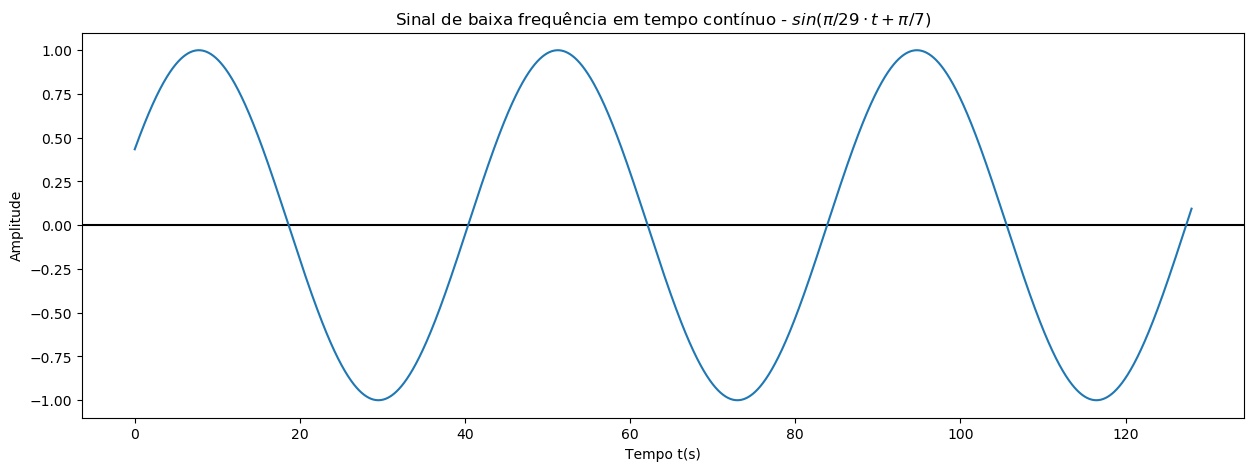

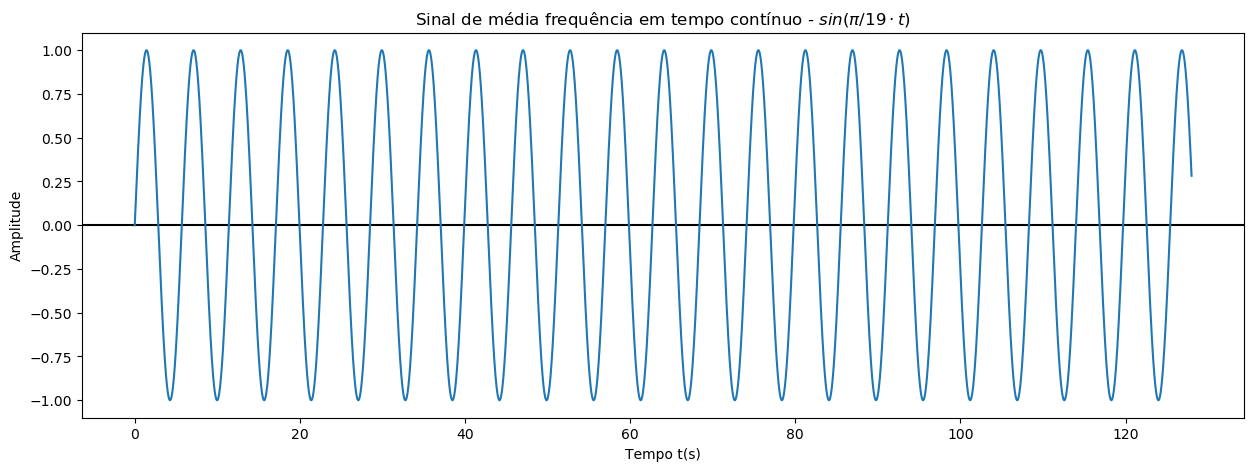

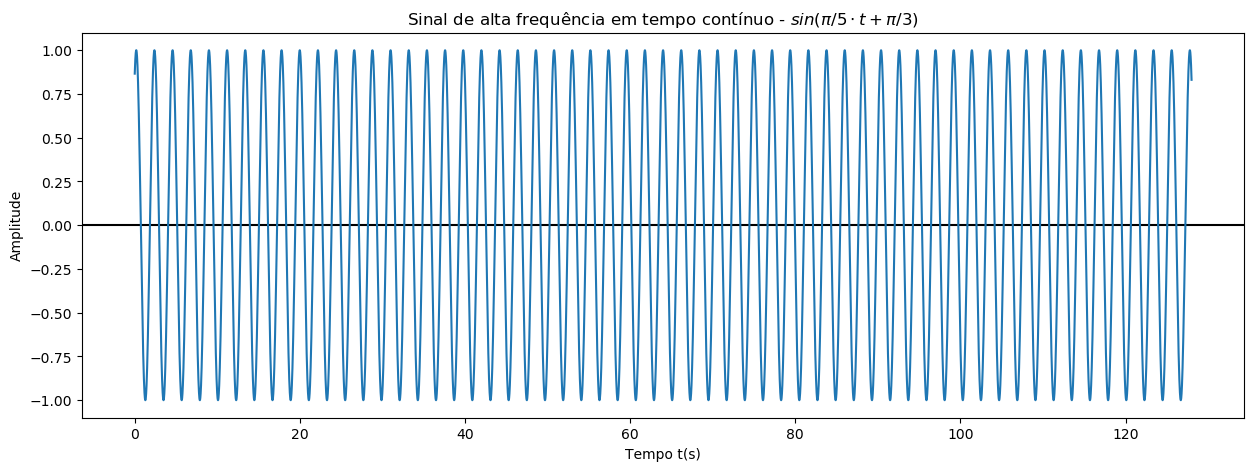

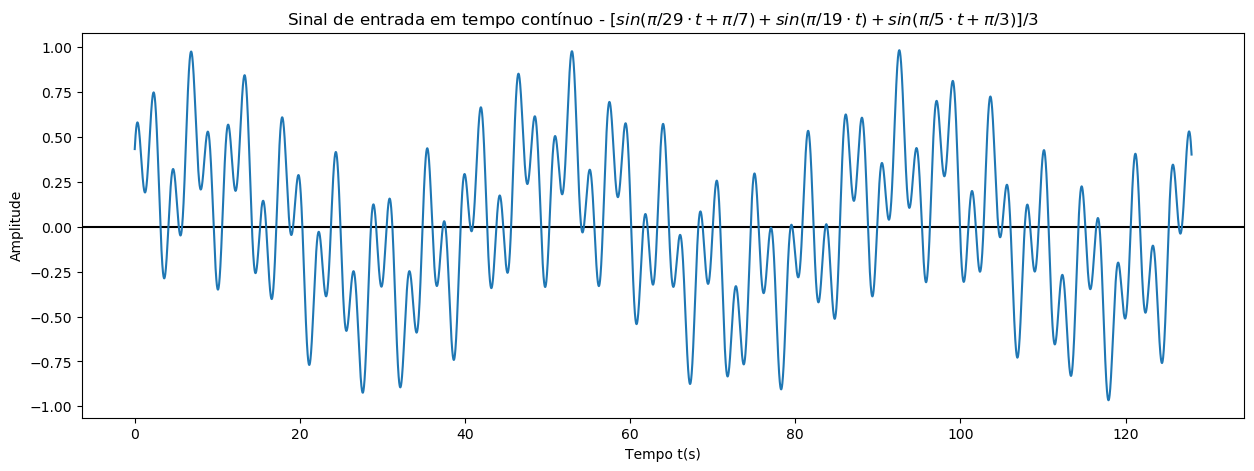

In [5]:
plotarFuncaoContinua(sample_low, "Sinal de baixa frequência em tempo contínuo - $sin(\pi/29 \cdot t + \pi/7)$", 128, 0.01)
plotarFuncaoContinua(sample_mid, "Sinal de média frequência em tempo contínuo - $sin(\pi/19 \cdot t)$", 128, 0.01)
plotarFuncaoContinua(sample_high, "Sinal de alta frequência em tempo contínuo - $sin(\pi/5 \cdot t + \pi/3)$", 128, 0.01)
plotarFuncaoContinua(sample_input_signal, "Sinal de entrada em tempo contínuo - $[sin(\pi/29 \cdot t + \pi/7) + sin(\pi/19 \cdot t) + sin(\pi/5 \cdot t + \pi/3)] / 3$", 128, 0.01)

#### 3.1.3 - Amostragem da soma de senoides

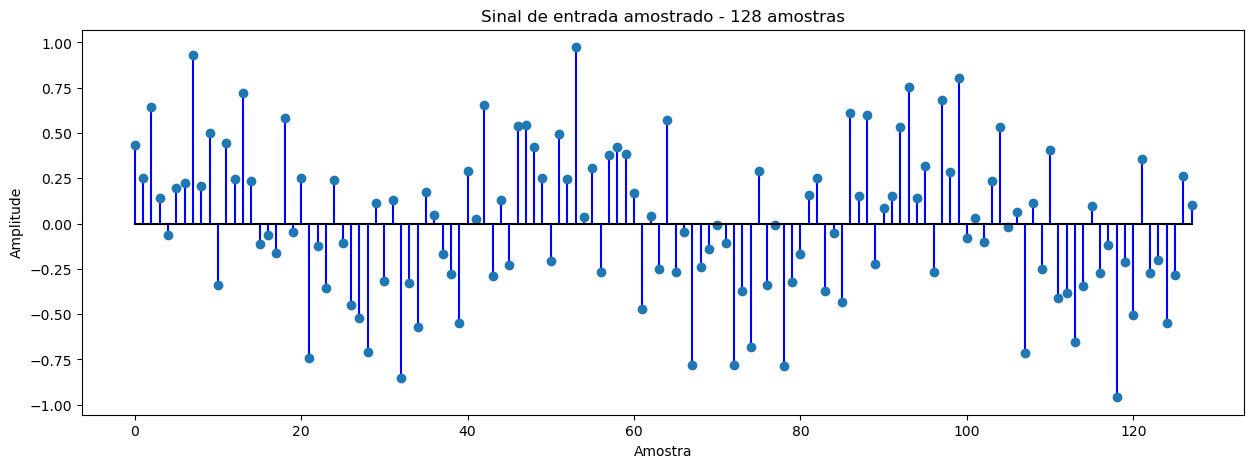

In [6]:
input_array = np.zeros(128)
for i in range(128):
    input_array[i] = sample_input_signal(i)

plotarAmostras(input_array, "Sinal de entrada amostrado - 128 amostras")

#### 3.1.4 - Plotagem da soma de senoides no domínio da frequência

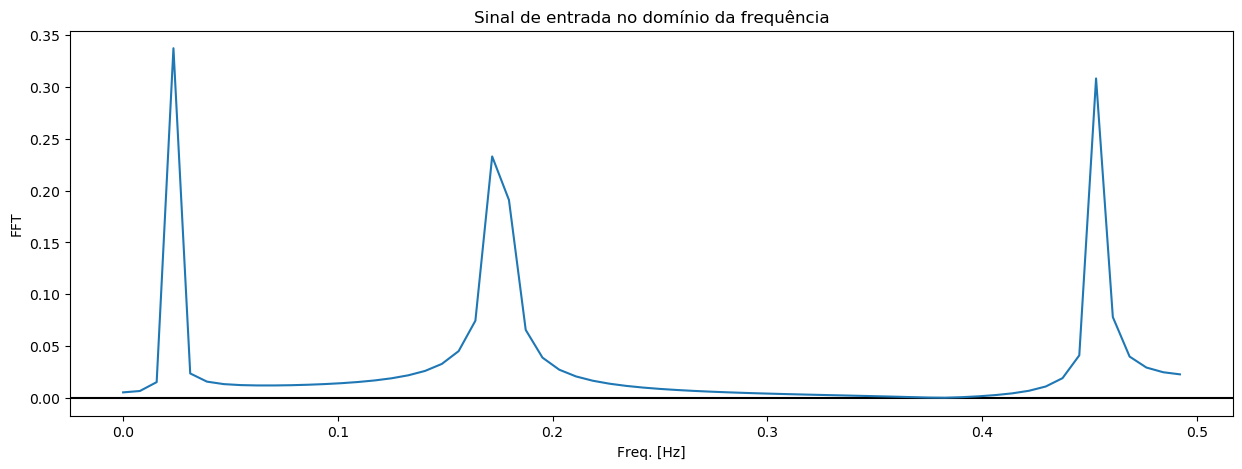

In [7]:
plotarSinalFreq(input_array, 128, 1, "Sinal de entrada no domínio da frequência")

#### 3.1.5 - Vetor de amostras da soma de senoides e conversão para Q15

In [8]:
print("Vetor da soma de senoides:", input_array)
print()
input_array_Q15 = float_to_q15(input_array)
print("Vetor da soma de senoides convertido para Q15:", input_array_Q15)
print()

Vetor da soma de senoides: [ 0.43330305  0.25376022  0.64555452  0.13945668 -0.06459964  0.1985456
  0.22473859  0.93300173  0.20807572  0.50233955 -0.34105634  0.44396947
  0.24752708  0.72228408  0.23453146 -0.10980331 -0.06443416 -0.16472998
  0.58109106 -0.04393309  0.2492341  -0.74094272 -0.12443732 -0.35375073
  0.24254503 -0.10934541 -0.44862129 -0.5200507  -0.70609921  0.11363431
 -0.31528389  0.13281486 -0.85474382 -0.32615781 -0.568349    0.17642248
  0.04522268 -0.16949455 -0.2769243  -0.55087239  0.29017448  0.02726922
  0.65578803 -0.29117299  0.12829062 -0.22817372  0.53710879  0.54270143
  0.4243306   0.24990776 -0.20826771  0.49641782  0.24877963  0.97375309
  0.0381784   0.30552094 -0.26977699  0.37727149  0.42104498  0.38190281
  0.16928888 -0.47074543  0.04459785 -0.24931484  0.57341652 -0.26900985
 -0.04746366 -0.77950379 -0.24005995 -0.13793926 -0.00734928 -0.10513463
 -0.78126144 -0.37397757 -0.68141881  0.29271947 -0.33744054 -0.00845338
 -0.7848263  -0.31967985 

In [9]:
# Array no formato CDATA para utilização na placa
print(array_to_cdata(input_array_Q15))

{
14198,
8315,
21153,
4569,
-2116,
6505,
7364,
30572,
6818,
16460,
-11175,
14547,
8110,
23667,
7685,
-3598,
-2111,
-5397,
19041,
-1439,
8166,
-24279,
-4077,
-11591,
7947,
-3583,
-14700,
-17041,
-23137,
3723,
-10331,
4352,
-28008,
-10687,
-18623,
5781,
1481,
-5553,
-9074,
-18050,
9508,
893,
21488,
-9541,
4203,
-7476,
17599,
17783,
13904,
8188,
-6824,
16266,
8152,
31907,
1251,
10011,
-8840,
12362,
13796,
12514,
5547,
-15425,
1461,
-8169,
18789,
-8814,
-1555,
-25542,
-7866,
-4519,
-240,
-3445,
-25600,
-12254,
-22328,
9591,
-11057,
-277,
-25717,
-10475,
-5452,
5171,
8341,
-12207,
-1758,
-14241,
19962,
5066,
19728,
-7317,
2891,
4922,
17480,
24647,
4712,
10352,
-8728,
22449,
9336,
26398,
-2610,
1015,
-3354,
7622,
17472,
-616,
2033,
-23344,
3642,
-8159,
13390,
-13430,
-12523,
-21395,
-11275,
3126,
-8848,
-3790,
-31401,
-6903,
-16595,
11619,
-8923,
-6596,
-18047,
-9314,
8675,
3440
}



### 3.2 - Sinal de amostras aleatórias

In [10]:
random_samples = [-0.1299932293737831, -0.20265844302767877, -0.8148970190249711, 0.993230079552021, 0.5222550196179643, -0.8526176406026489, -0.05299249409229523, 0.15988439811855137, 0.1413592629001481, 0.16294219666512633, -0.42912412197556304, -0.3896302812022303, -0.5188096782611629, -0.589712236263914, 0.8678859026315022, -0.9101625014598123, 0.053441177832854736, 0.4021673429291426, 0.5360216351325628, 0.5144038931493022, 0.5013246197625363, 0.03976760852248429, 0.1221476699198063, 0.8953527198779005, -0.847610521371752, -0.41274902740763886, -0.19627704694610193, 0.5204114181876809, -0.8751776919821124, 0.4354108776359311, 0.03426417650100744, -0.1964877185830698, -0.9608224520439139, 0.9846691369616143, 0.7090494796190812, -0.05743935399211697, 0.9133336930583273, -0.06580071517530439, 0.14641067172689826, -0.5582879607761413, -0.12938440222692305, -0.6853655535280134, 0.5459200963799704, -0.7733736467070587, 0.2859333796588177, 0.04081224676948758, -0.36178654332671956, 0.050398167183346, -0.8458886328752966, 0.8512798982997059, 0.02537066551137568, -0.682238016561268, 0.8756833032605313, -0.6567661575276948, 0.3745662381140886, 0.4784416087064238, 0.8266169739287887, 0.8177832890142793, -0.719981126265566, -0.8052373235535613, 0.9461165032146812, -0.1819549678146224, -0.311200920689932, 0.815816412461273, 0.12867968415281594, 0.6262294592527975, 0.5185815470723283, 0.30573847567335566, -0.42340236414982324, -0.8674005347133762, 0.22373608236105524, -0.8390675657785394, 0.22740368695466118, 0.18604159297244593, -0.7580387911804656, 0.49779620710275574, 0.6513429590257223, -0.7325005658987995, 0.8038762823076286, -0.9210571783943629, 0.45766744679744464, 0.591139758397409, 0.6734493392709984, -0.9811259759712676, -0.5439170936094473, 0.8466358634880711, -0.9200338915119184, -0.7726940652291681, -0.5693830888045088, -0.83631972081694, 0.6522356021896085, -0.6951991406797409, -0.4306324238378454, -0.8189240951561292, -0.23659404720643362, -0.10364821006376723, 0.498956166371173, -0.1276420155108926, -0.8493395619933364, -0.19192837304347643, 0.004081670303439644, 0.7341728258152065, 0.7314280389791128, 0.16808587514340445, -0.3467120711576088, 0.10735479615653665, -0.40146647446322015, 0.4730344245404279, -0.4703229830163185, 0.3990788591422929, 0.8949665211117515, 0.9809468003704334, -0.16310912658774912, 0.11599121833974357, -0.7198080980755956, -0.4607635392474325, -0.965777833765511, -0.953324143850848, 0.018872999754086184, 0.5527483894328551, 0.510921390673263, 0.49991639268595445, -0.8918238236240132, 0.6475972563686763, 0.37335537287444387, 0.9708334320913996, -0.800268205754086, 0.5845842775864385]

#### 3.2.1 - Plotagem da forma de onda do sinal aleatório

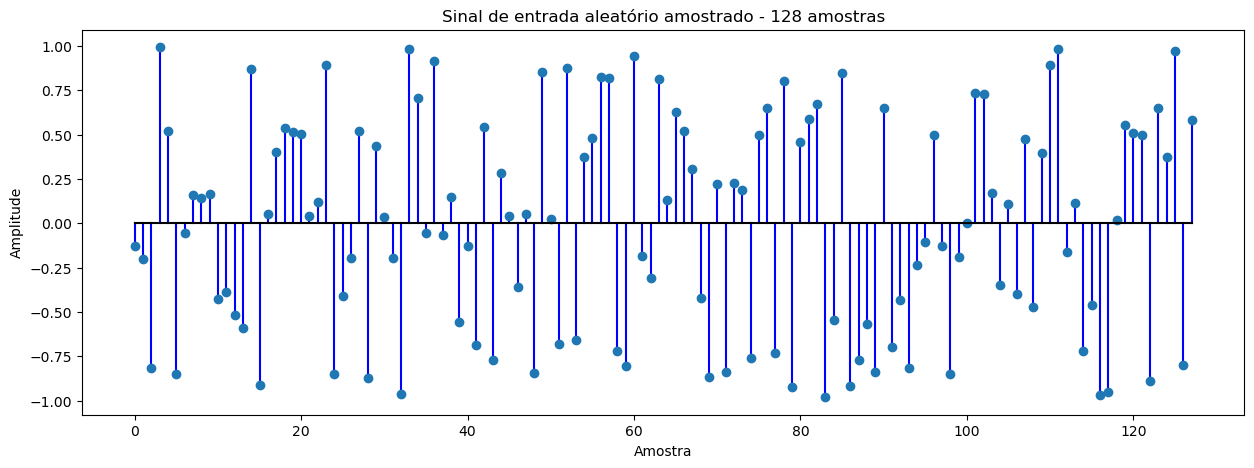

In [11]:
plotarAmostras(random_samples, "Sinal de entrada aleatório amostrado - 128 amostras")

#### 3.2.2 - Plotagem do sinal aleatório no domínio da frequência

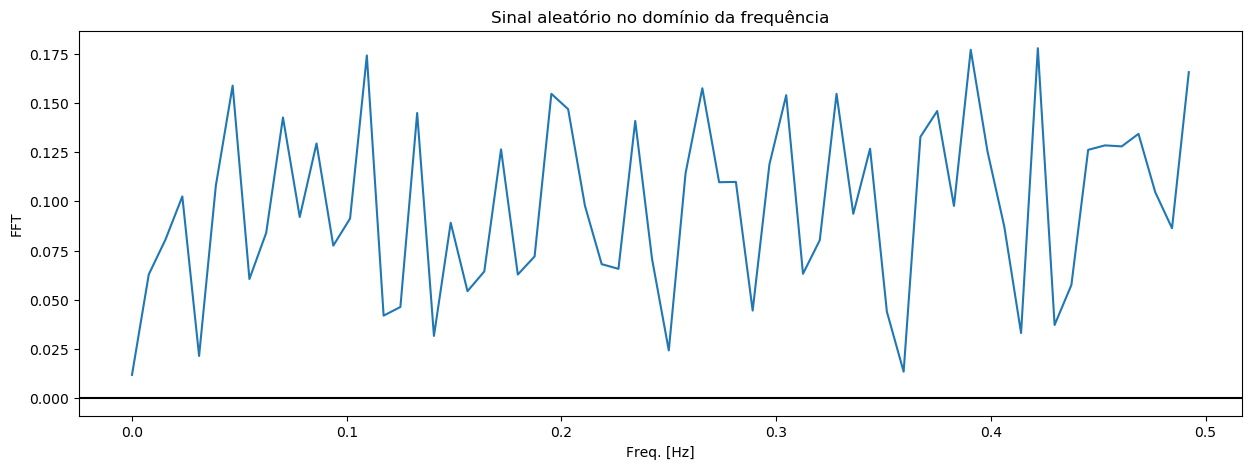

In [12]:
plotarSinalFreq(random_samples, 128, 1, "Sinal aleatório no domínio da frequência")

#### 3.2.3 Vetor de amostras do sinal aleatório e conversão para Q15

In [13]:
print("Vetor do sinal aleatório:", random_samples)
print()
random_samples_Q15 = float_to_q15(random_samples)
print("Vetor do sinal aleatório convertido para Q15:", random_samples_Q15)
print()

Vetor do sinal aleatório: [-0.1299932293737831, -0.20265844302767877, -0.8148970190249711, 0.993230079552021, 0.5222550196179643, -0.8526176406026489, -0.05299249409229523, 0.15988439811855137, 0.1413592629001481, 0.16294219666512633, -0.42912412197556304, -0.3896302812022303, -0.5188096782611629, -0.589712236263914, 0.8678859026315022, -0.9101625014598123, 0.053441177832854736, 0.4021673429291426, 0.5360216351325628, 0.5144038931493022, 0.5013246197625363, 0.03976760852248429, 0.1221476699198063, 0.8953527198779005, -0.847610521371752, -0.41274902740763886, -0.19627704694610193, 0.5204114181876809, -0.8751776919821124, 0.4354108776359311, 0.03426417650100744, -0.1964877185830698, -0.9608224520439139, 0.9846691369616143, 0.7090494796190812, -0.05743935399211697, 0.9133336930583273, -0.06580071517530439, 0.14641067172689826, -0.5582879607761413, -0.12938440222692305, -0.6853655535280134, 0.5459200963799704, -0.7733736467070587, 0.2859333796588177, 0.04081224676948758, -0.361786543326719

In [14]:
# Array no formato CDATA para utilização na placa
print(array_to_cdata(random_samples_Q15))

{
-4259,
-6640,
-26702,
32546,
17113,
-27938,
-1736,
5239,
4632,
5339,
-14061,
-12767,
-17000,
-19323,
28438,
-29824,
1751,
13178,
17564,
16855,
16427,
1303,
4002,
29338,
-27774,
-13524,
-6431,
17052,
-28677,
14267,
1122,
-6438,
-31484,
32265,
23234,
-1882,
29928,
-2156,
4797,
-18293,
-4239,
-22458,
17888,
-25341,
9369,
1337,
-11855,
1651,
-27718,
27894,
831,
-22355,
28694,
-21520,
12273,
15677,
27086,
26797,
-23592,
-26386,
31002,
-5962,
-10197,
26732,
4216,
20520,
16992,
10018,
-13874,
-28422,
7331,
-27494,
7451,
6096,
-24839,
16311,
21343,
-24002,
26341,
-30181,
14996,
19370,
22067,
-32149,
-17823,
27742,
-30147,
-25319,
-18657,
-27404,
21372,
-22780,
-14110,
-26834,
-7752,
-3396,
16349,
-4182,
-27831,
-6289,
133,
24057,
23967,
5507,
-11361,
3517,
-13155,
15500,
-15411,
13077,
29326,
32143,
-5344,
3800,
-23586,
-15098,
-31646,
-31238,
618,
18112,
16741,
16381,
-29223,
21220,
12234,
31812,
-26223,
19155
}



## 4 - Filtros

In [27]:
N = 6
Wn = 0.25
num, den = signal.butter(N, Wn, btype='low', analog=False, output='ba', fs=1)
sos = signal.butter(N, Wn, btype='low', analog=False, output='sos', fs=1)
#sos = signal.tf2sos(num, den, 'nearest')

#print(sos)

#plotarFreqz(num, den, "BA")
#plotarSOS(sos, "SOS")

print(num)
print()

print(den)
print()

[0.02958822 0.17752934 0.44382335 0.59176447 0.44382335 0.17752934
 0.02958822]

[ 1.00000000e+00 -4.99600361e-16  7.77695962e-01 -2.27302479e-16
  1.14199425e-01 -1.35753368e-17  1.75092596e-03]

